## Exploration 15

# 손메모 인식  OCR

## 1. 검증용 데이터셋 준비

In [1]:
import os 
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/test img' 
file_list = os.listdir(img_dir) 
file_list

['test_img17.jpg',
 'test_img05.jpg',
 'test_img01.jpg',
 'test_img15.jpg',
 'test_img14.jpg',
 'test_img03.jpg',
 'test_img16.jpg',
 'test_img06.jpg',
 'test_img09.jpg',
 'test_img04.jpg',
 'test_img08.jpg',
 'test_img13.jpg',
 'test_img07.jpg',
 'test_img19.jpg',
 'test_img18.jpg',
 'test_img11.jpg',
 'test_img12.jpg',
 'test_img10.jpg',
 'test_img20.jpg',
 'test_img02.jpg']

## 2. OCR테스트
### Google OCR API

In [2]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
for file in file_list: 
    print(f'[{file}]') 
    detect_text(os.path.join(img_dir, file)) 
    print()



total 117760
-rw-r--r-- 1 root root     4913 Feb 21 08:37 '[혼공머]07.ipynb'
-rw-r--r-- 1 root root   356493 Feb 16 07:22 '[혼공머]8-1.ipynb'
-rw-r--r-- 1 root root   661586 Feb 21 05:48 '[혼공머]8-2 다혜님.ipynb'
-rw-r--r-- 1 root root      176 Feb  1 16:10  billboardchart.csv
-rw-r--r-- 1 root root      209 Feb  1 16:17  billboardchart_out.csv
-rw-r--r-- 1 root root     5995 Jan 24 10:55 '[CS231]04.ipynb'
-rw-r--r-- 1 root root  1209703 Feb  9 07:21 '[CS231]06.ipynb'
-rw-r--r-- 1 root root     1094 Feb 14 02:46 '[CS231]07.ipynb'
-rw-r--r-- 1 root root    14661 Feb 14 05:55 '[CS231]07_민균님.ipynb'
-rw-r--r-- 1 root root  1389317 Feb 17 17:32  diabetes1.png
-rw-r--r-- 1 root root   159828 Feb 17 17:33  diabetes2.png
-rw-r--r-- 1 root root    82612 Feb  4 07:10 '[EX01].ipynb'
-rw-r--r-- 1 root root    15863 Jan 11 05:48 '[EX01]과제제출용(RSP).ipynb'
-rw-r--r-- 1 root root    53223 Jan  6 06:21 '[EX02].ipynb'
-rw-r--r-- 1 root root    69250 Jan 13 06:14 '[EX02]과제제출용(Iris).ipynb'
-rw-r--r-- 1 root root   70

### keras-ocr

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
"""
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]
"""
images = [keras_ocr.tools.read(os.path.join(img_dir, file)) for file in file_list] 
prediction_groups = [pipeline.recognize([os.path.join(img_dir, file)]) for file in file_list]

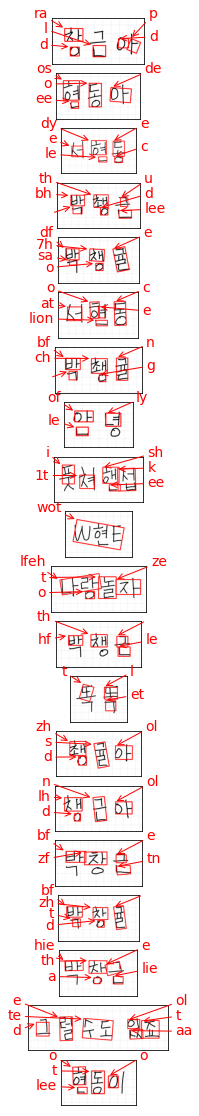

In [6]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### Tesseract

In [7]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [10]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/test img'

for file in file_list:
    print(f'[{file}]')
    try:
        recognize_images(os.path.join(img_dir, file), save_dir)
    except:
        print(f'Cannot recognize characters from {file}')

[test_img17.jpg]
Cannot recognize characters from test_img17.jpg
[test_img05.jpg]
Cannot recognize characters from test_img05.jpg
[test_img01.jpg]
Cannot recognize characters from test_img01.jpg
[test_img15.jpg]
Cannot recognize characters from test_img15.jpg
[test_img14.jpg]
Cannot recognize characters from test_img14.jpg
[test_img03.jpg]
Cannot recognize characters from test_img03.jpg
[test_img16.jpg]
Cannot recognize characters from test_img16.jpg
[test_img06.jpg]
Cannot recognize characters from test_img06.jpg
[test_img09.jpg]
Cannot recognize characters from test_img09.jpg
[test_img04.jpg]
Cannot recognize characters from test_img04.jpg
[test_img08.jpg]
Cannot recognize characters from test_img08.jpg
[test_img13.jpg]
Cannot recognize characters from test_img13.jpg
[test_img07.jpg]
Cannot recognize characters from test_img07.jpg
[test_img19.jpg]
Cannot recognize characters from test_img19.jpg
[test_img18.jpg]
Cannot recognize characters from test_img18.jpg
[test_img11.jpg]
Cannot r

# 회고

손메모를 전자메모로 옮기는 경우를 생각하며 직접 아이패드에 메모한 내용을 캡쳐하여 사용하였다.

* Google OCR API:  한글과 영어 모두 비교적 인식이 잘 되었다. 비교적 글자 사이 간격을 넓게 적었기 때문에 인식이 잘 된 것 같기도 하다. 
    
* keras-ocr: 영어를 인식하였지만 한글은 아예 인식하지 못하였다. 영어와 한글이 합쳐진 경우, 맨 앞의 영어만 제대로 인식하였다.

* Tesseract: 모든 텍스트에 대해 인식하지 못했다.


Google API 정도만 OCR로 사용할 수 있을 것 같다.

**참고**
https://github.com/LilPark/